<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np 
import plotnine as gg
from plotnine import ggplot, aes 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from collections import defaultdict
from functools import reduce 
import prophet as pr


# Customer Analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'sales.csv',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 'mall_customers.csv',
 'online_retail_II.xlsx',
 'scanner_data.csv',
 'sales_data_with_stores.csv',
 'match_result_test.csv',
 'online_retail.xlsx',
 'mock_sales_data.csv',
 '1_orders_dataset.csv',
 'ecommerce-data.csv',
 'bz_data_analyis.csv',
 'test.csv',
 'groceries.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [5]:
df = pd.read_csv('bz_data_analyis.csv')
df.order_date	= pd.to_datetime(df.order_date, infer_datetime_format=True)
df['ds'] = df.order_date.to_numpy().astype('datetime64[D]')
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,ds
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18


In [6]:
df['quantity_ordered'].value_counts()

1          109128
1           59357
2            8663
2            4707
3            1867
3            1066
4             529
4             280
5             152
5              86
6              49
6              31
7              18
7               6
8               5
9               3
1+C1273         1
32              1
22              1
Name: quantity_ordered, dtype: int64

In [26]:
df['quantity_ordered'] = df['quantity_ordered'].apply(lambda x : np.where(re.search('\+', str(x)), '1', x))
df['quantity_ordered'] = df['quantity_ordered'].astype(int)

In [24]:
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,ds,x
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,1
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,3
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,3
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,1


In [27]:
df['rev'] = df.quantity_ordered * df.price_each

In [39]:
list_product = df['product'].value_counts().reset_index().rename(columns = {'index':'product', 'product':'cnt'})
list_product['type'] = ['cable', 'cable', 'battery', 'battery', 'headphone', 'headphone', 'headphone',
                        'monitor', 'mobile', 'monitor', 'monitor', 'mobile', 'tv', 'laptop', 'laptop', 'monitor',
                        'mobile', 'whites', 'whites']
list_product
products = dict(zip(list_product['product'], list_product['type']))
products

{'USB-C Charging Cable': 'cable',
 'Lightning Charging Cable': 'cable',
 'AAA Batteries (4-pack)': 'battery',
 'AA Batteries (4-pack)': 'battery',
 'Wired Headphones': 'headphone',
 'Apple Airpods Headphones': 'headphone',
 'Bose SoundSport Headphones': 'headphone',
 '27in FHD Monitor': 'monitor',
 'iPhone': 'mobile',
 '27in 4K Gaming Monitor': 'monitor',
 '34in Ultrawide Monitor': 'monitor',
 'Google Phone': 'mobile',
 'Flatscreen TV': 'tv',
 'Macbook Pro Laptop': 'laptop',
 'ThinkPad Laptop': 'laptop',
 '20in Monitor': 'monitor',
 'Vareebadd Phone': 'mobile',
 'LG Washing Machine': 'whites',
 'LG Dryer': 'whites'}

In [40]:
df['type'] = df['product'].apply(lambda x : products.get(x,x))

In [41]:
cnt = df.groupby(['ds','type'])['rev'].sum().reset_index().rename(columns = {'rev':'y'})
cnt.head()

,ds,type,y
0,2019-01-01,battery,309.11
1,2019-01-01,cable,1141.75
2,2019-01-01,headphone,5021.54
3,2019-01-01,laptop,24299.91
4,2019-01-01,mobile,19200.00


In [44]:
temp = cnt[cnt['type'] == 'cable'].reindex(['ds', 'y'], axis = 1)
temp.head()

,ds,y
1,2019-01-01,1141.75
9,2019-01-02,968.40
17,2019-01-03,1156.70
25,2019-01-04,1219.35
33,2019-01-05,971.45


In [45]:
m = pr.Prophet().fit(temp)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81hlshe6/156hymd3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81hlshe6/i4a_5mqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34459', 'data', 'file=/tmp/tmp81hlshe6/156hymd3.json', 'init=/tmp/tmp81hlshe6/i4a_5mqm.json', 'output', 'file=/tmp/tmp81hlshe6/prophet_modelod3cjnfj/prophet_model-20221112001811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods = 60)
forecast = m.predict(future)

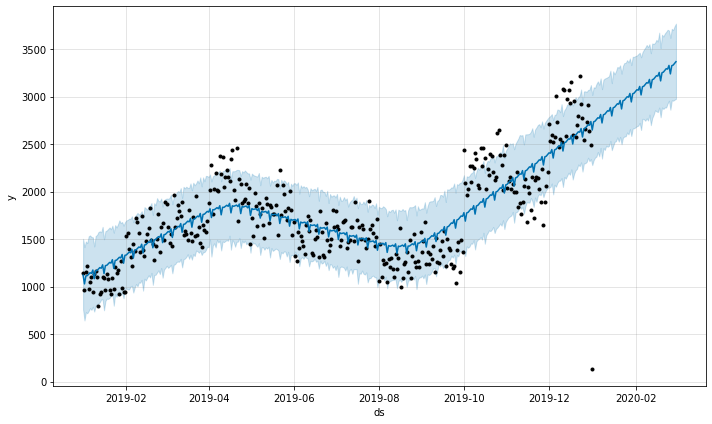

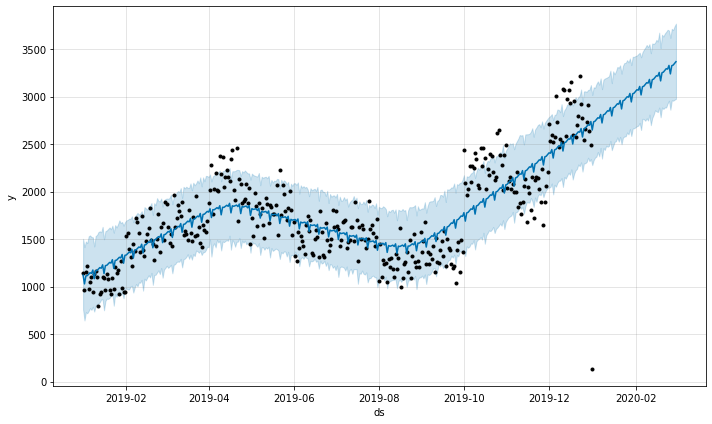

In [47]:
m.plot(forecast)

In [74]:
m = pr.Prophet().add_seasonality(name = 'daily', period = 90, fourier_order = 10)
m = m.fit(temp)
future2 = m.make_future_dataframe(periods = 60)
forecast2 = m.predict(future2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81hlshe6/7h2mspnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81hlshe6/athviteg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71574', 'data', 'file=/tmp/tmp81hlshe6/7h2mspnc.json', 'init=/tmp/tmp81hlshe6/athviteg.json', 'output', 'file=/tmp/tmp81hlshe6/prophet_modelp29w606m/prophet_model-20221112003106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


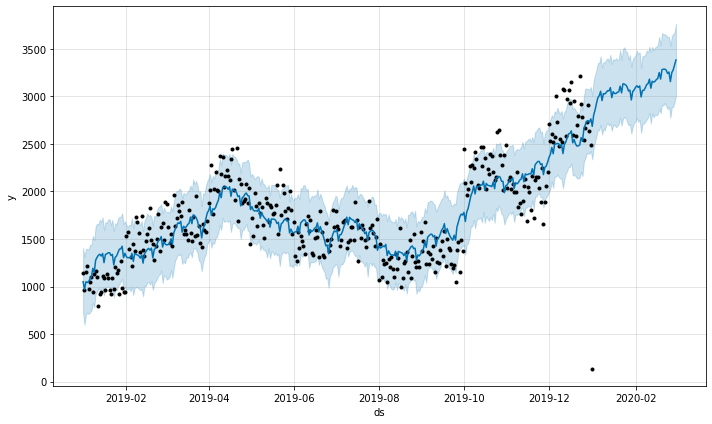

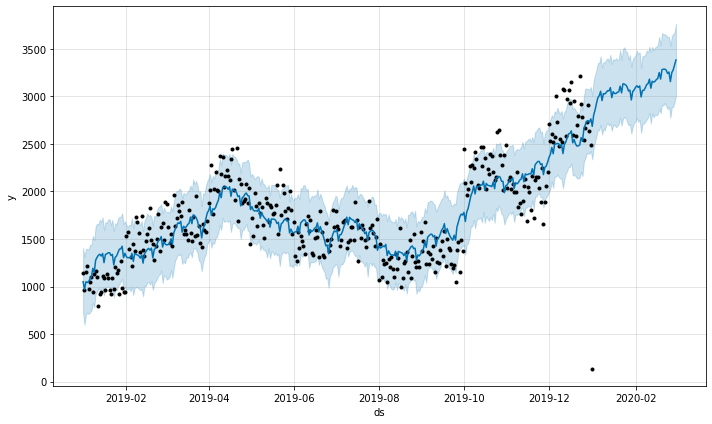

In [75]:
m.plot(forecast2)

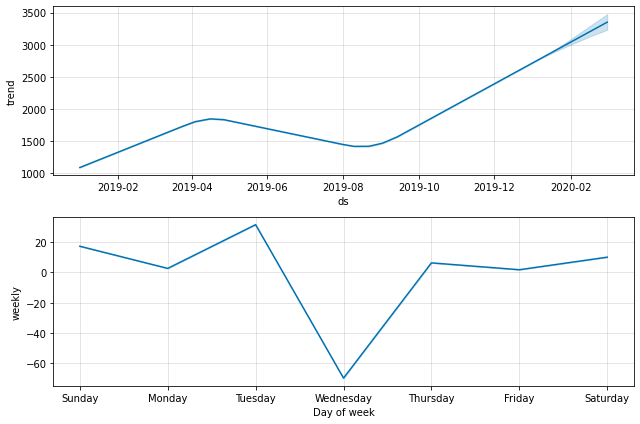

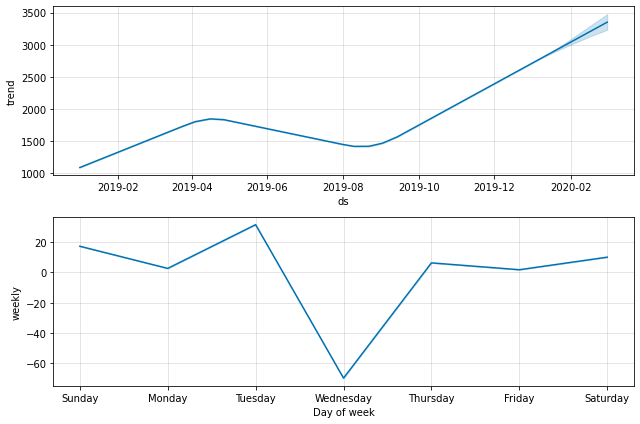

In [76]:
m.plot_components(forecast)

In [77]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,1020.760100,725.517633,1405.951016,1020.760100,1020.760100,30.377929,30.377929,30.377929,-1.146130,-1.146130,-1.146130,31.524059,31.524059,31.524059,0.0,0.0,0.0,1051.138029
1,2019-01-02,1029.672711,597.280355,1311.241989,1029.672711,1029.672711,-58.959544,-58.959544,-58.959544,10.750704,10.750704,10.750704,-69.710248,-69.710248,-69.710248,0.0,0.0,0.0,970.713167
2,2019-01-03,1038.585322,702.590621,1395.235965,1038.585322,1038.585322,11.661234,11.661234,11.661234,5.338219,5.338219,5.338219,6.323015,6.323015,6.323015,0.0,0.0,0.0,1050.246556
3,2019-01-04,1047.497933,727.353215,1394.836877,1047.497933,1047.497933,-4.881917,-4.881917,-4.881917,-6.687091,-6.687091,-6.687091,1.805173,1.805173,1.805173,0.0,0.0,0.0,1042.616016
4,2019-01-05,1056.410545,710.833709,1390.296291,1056.410545,1056.410545,-2.023024,-2.023024,-2.023024,-12.108033,-12.108033,-12.108033,10.085009,10.085009,10.085009,0.0,0.0,0.0,1054.387521


In [78]:
x = forecast2[['ds', 'trend', 'yhat']]
x = pd.melt(x, id_vars='ds')
x.head()

,ds,variable,value
0,2019-01-01,trend,1020.760100
1,2019-01-02,trend,1029.672711
2,2019-01-03,trend,1038.585322
3,2019-01-04,trend,1047.497933
4,2019-01-05,trend,1056.410545


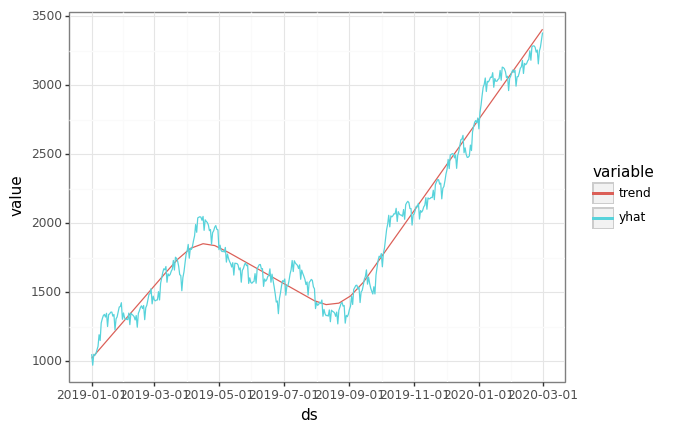

<ggplot: (8773048148173)>

In [79]:
(
    ggplot(x, aes('ds', 'value', color = 'variable')) +
    gg.geom_line() +
    gg.theme_bw()
)

In [ ]:
m = pr.Prophet().add_seasonality(name = 'daily', period = 90, fourier_order = 10)
m = m.fit(temp)
future2 = m.make_future_dataframe(periods = 60)
forecast2 = m.predict(future2)
x = forecast2[['ds', 'trend', 'yhat']]
x = pd.melt(x, id_vars='ds')
x.head()

In [89]:
def get_oracle(df) :

  list_work = list_product['type']

  res = list()

  for worker in list_work : 

    try :
      temp = cnt[cnt['type'] == worker].reindex(['ds', 'y'], axis = 1)

      m = pr.Prophet().add_seasonality(name = 'daily', period = 90, fourier_order = 10)
      m = m.fit(temp)

      future2 = m.make_future_dataframe(periods = 60)
      forecast2 = m.predict(future2)
      temp = forecast2[['ds', 'trend', 'yhat']]
      temp.insert(0, 'type', np.repeat(worker, len(temp)))

      res.append(res)
    except : 
      print(f'{worker} is error')
  
  return res

res = get_oracle(cnt)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81hlshe6/8czvu10_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81hlshe6/ifpjfg_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69112', 'data', 'file=/tmp/tmp81hlshe6/8czvu10_.json', 'init=/tmp/tmp81hlshe6/ifpjfg_q.json', 'output', 'file=/tmp/tmp81hlshe6/prophet_modeld40pwbfz/prophet_model-20221112004404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run p

# Iterator

In [93]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [94]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}